Finding likely components

Means:
[[ 1.27172922e+02  1.26605367e+02]
 [ 2.55165668e+02  1.27358500e+02]
 [ 2.67439699e-01  2.54518161e+02]
 [ 9.95904977e-02  1.26934805e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 1.26931688e+02  2.54851953e+02]]

Covariances:
[[[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]]


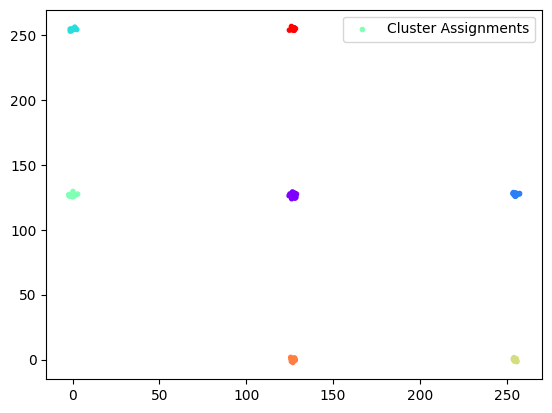

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pickle

file_path = "colors.pkl"
with open(file_path, 'rb') as file:
    data = pickle.load(file)

n_components = 7  
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(data)
cluster_assignments = gmm.predict(data)

sample_means = gmm.means_
sample_covariances = gmm.covariances_

print("Means:")
print(sample_means)
print()
print("Covariances:")
print(sample_covariances)

plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='rainbow', marker='.', label='Cluster Assignments')
plt.legend()
plt.show()

  

Generating sample dataset

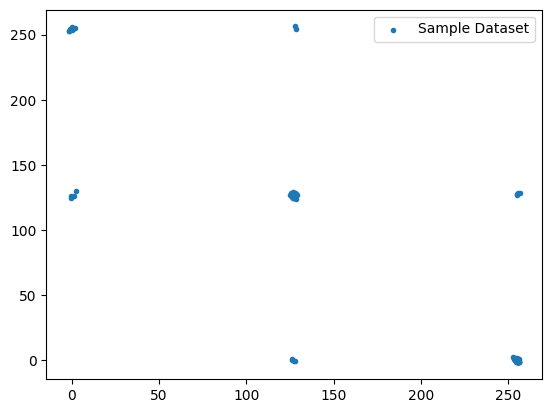

In [8]:
def generate_sample_dataset(n, means, covariances, total_samples):
    proportions = np.random.dirichlet(np.ones(n))
    dataset = []

    for i in range(n):
        num_samples = int(proportions[i] * total_samples)
        data_points = np.random.multivariate_normal(means[i], covariances[i], num_samples)
        dataset.extend(data_points)

    dataset = np.array(dataset)
    return dataset

sample_dataset = generate_sample_dataset(n_components, sample_means, sample_covariances, data.shape[0])
plt.scatter(sample_dataset[:, 0], sample_dataset[:, 1], marker='.', label='Sample Dataset')
plt.legend()
plt.show()

- The data in Task 2 was generated using the same means and variances as in Task 1, resulting in graphs that exhibit remarkable similarity. This confirms the reliability of both GMM and the method of utilizing GMM to create data.